# Multivariate Linear Regression Optimization

Used for plugging in synthetic optimization dataset to find the optimal value for parameters

In [89]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Function Definitions

Returns the Linear Regression Equation for the model in a readable format

In [90]:
def getEq(weights, cols, intercept):
    return ('Formula: y =  {} + {}({}) + {}({}) + {}({}) + {}({})'.format(intercept, weights[0], cols[0], weights[1], cols[1], weights[2], cols[2], weights[3], cols[3]))

#### Cleaning Data

In [91]:
cols =['Temp','Speed','Distance','Pressure']
collectedDataset = pd.read_csv('../deviceSummary.csv')
X = collectedDataset.iloc[:, 1:-1].values
y = collectedDataset.iloc[:, -1].values

generatedDataset = pd.read_csv('../optimizedSyntheticDataset.csv')
genData = generatedDataset.iloc[:, 0:-1].values



#### Spliting Classes

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print("Test Size: " + str(len(X_test)))
print("Train Size: " + str(len(X_train)))

Test Size: 16
Train Size: 90


#### Calculating Regressions

In [93]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
optimal = regressor.predict(genData)
print(cols[3])
print(getEq(regressor.coef_, cols, regressor.intercept_))

Pressure
Formula: y =  15.635597816342987 + -0.14620006191377913(Temp) + -0.008506762271706148(Speed) + -0.11195034096118744(Distance) + 0.02868000086458266(Pressure)


In [94]:
effToParam = {}
for i in range(len(optimal)):
    effToParam[optimal[i]] = genData[i]

### Sorting
Sorts and Returns Params for Highest Efficiency Combinations

In [95]:
optimal.sort()
optimal = np.flip(optimal)
numParams = 50
print("Printing Top {} Combinations of Paramaters".format(numParams))
print("Order is as follows:")
print("Efficiency,\t\t Temp, Speed, Distance Pressure")
print('-'*35)
for i in range(numParams):
    print(optimal[i], '\t',  str(effToParam[optimal[i]]))

Printing Top 50 Combinations of Paramaters
Order is as follows:
Efficiency,		 Temp, Speed, Distance Pressure
-----------------------------------
6.989297740530651 	 [ 50 125   5  10]
6.980790978258945 	 [ 50 126   5  10]
6.972284215987239 	 [ 50 127   5  10]
6.963777453715533 	 [ 50 128   5  10]
6.960617739666068 	 [ 50 125   5   9]
6.955270691443827 	 [ 50 129   5  10]
6.952110977394362 	 [ 50 126   5   9]
6.946763929172121 	 [ 50 130   5  10]
6.943604215122656 	 [ 50 127   5   9]
6.938257166900414 	 [ 50 131   5  10]
6.93509745285095 	 [ 50 128   5   9]
6.931937738801485 	 [ 50 125   5   8]
6.929750404628708 	 [ 50 132   5  10]
6.9265906905792445 	 [ 50 129   5   9]
6.9234309765297795 	 [ 50 126   5   8]
6.921243642357002 	 [ 50 133   5  10]
6.918083928307539 	 [ 50 130   5   9]
6.914924214258074 	 [ 50 127   5   8]
6.912736880085296 	 [ 50 134   5  10]
6.909577166035831 	 [ 50 131   5   9]
6.906417451986368 	 [ 50 128   5   8]
6.90423011781359 	 [ 50 135   5  10]
6.903257737936903 	

#### Calculating Statistical Values

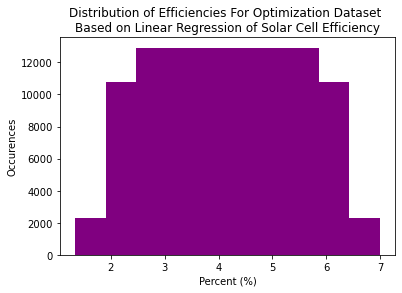

In [96]:
plt.hist(optimal, color='purple')
plt.title('Distribution of Efficiencies For Optimization Dataset \nBased on Linear Regression of Solar Cell Efficiency')
plt.xlabel('Percent (%)')
plt.ylabel('Occurences')
print('')

#### Graphing Results